[107.81, 108.52, 14.5, 15.35]


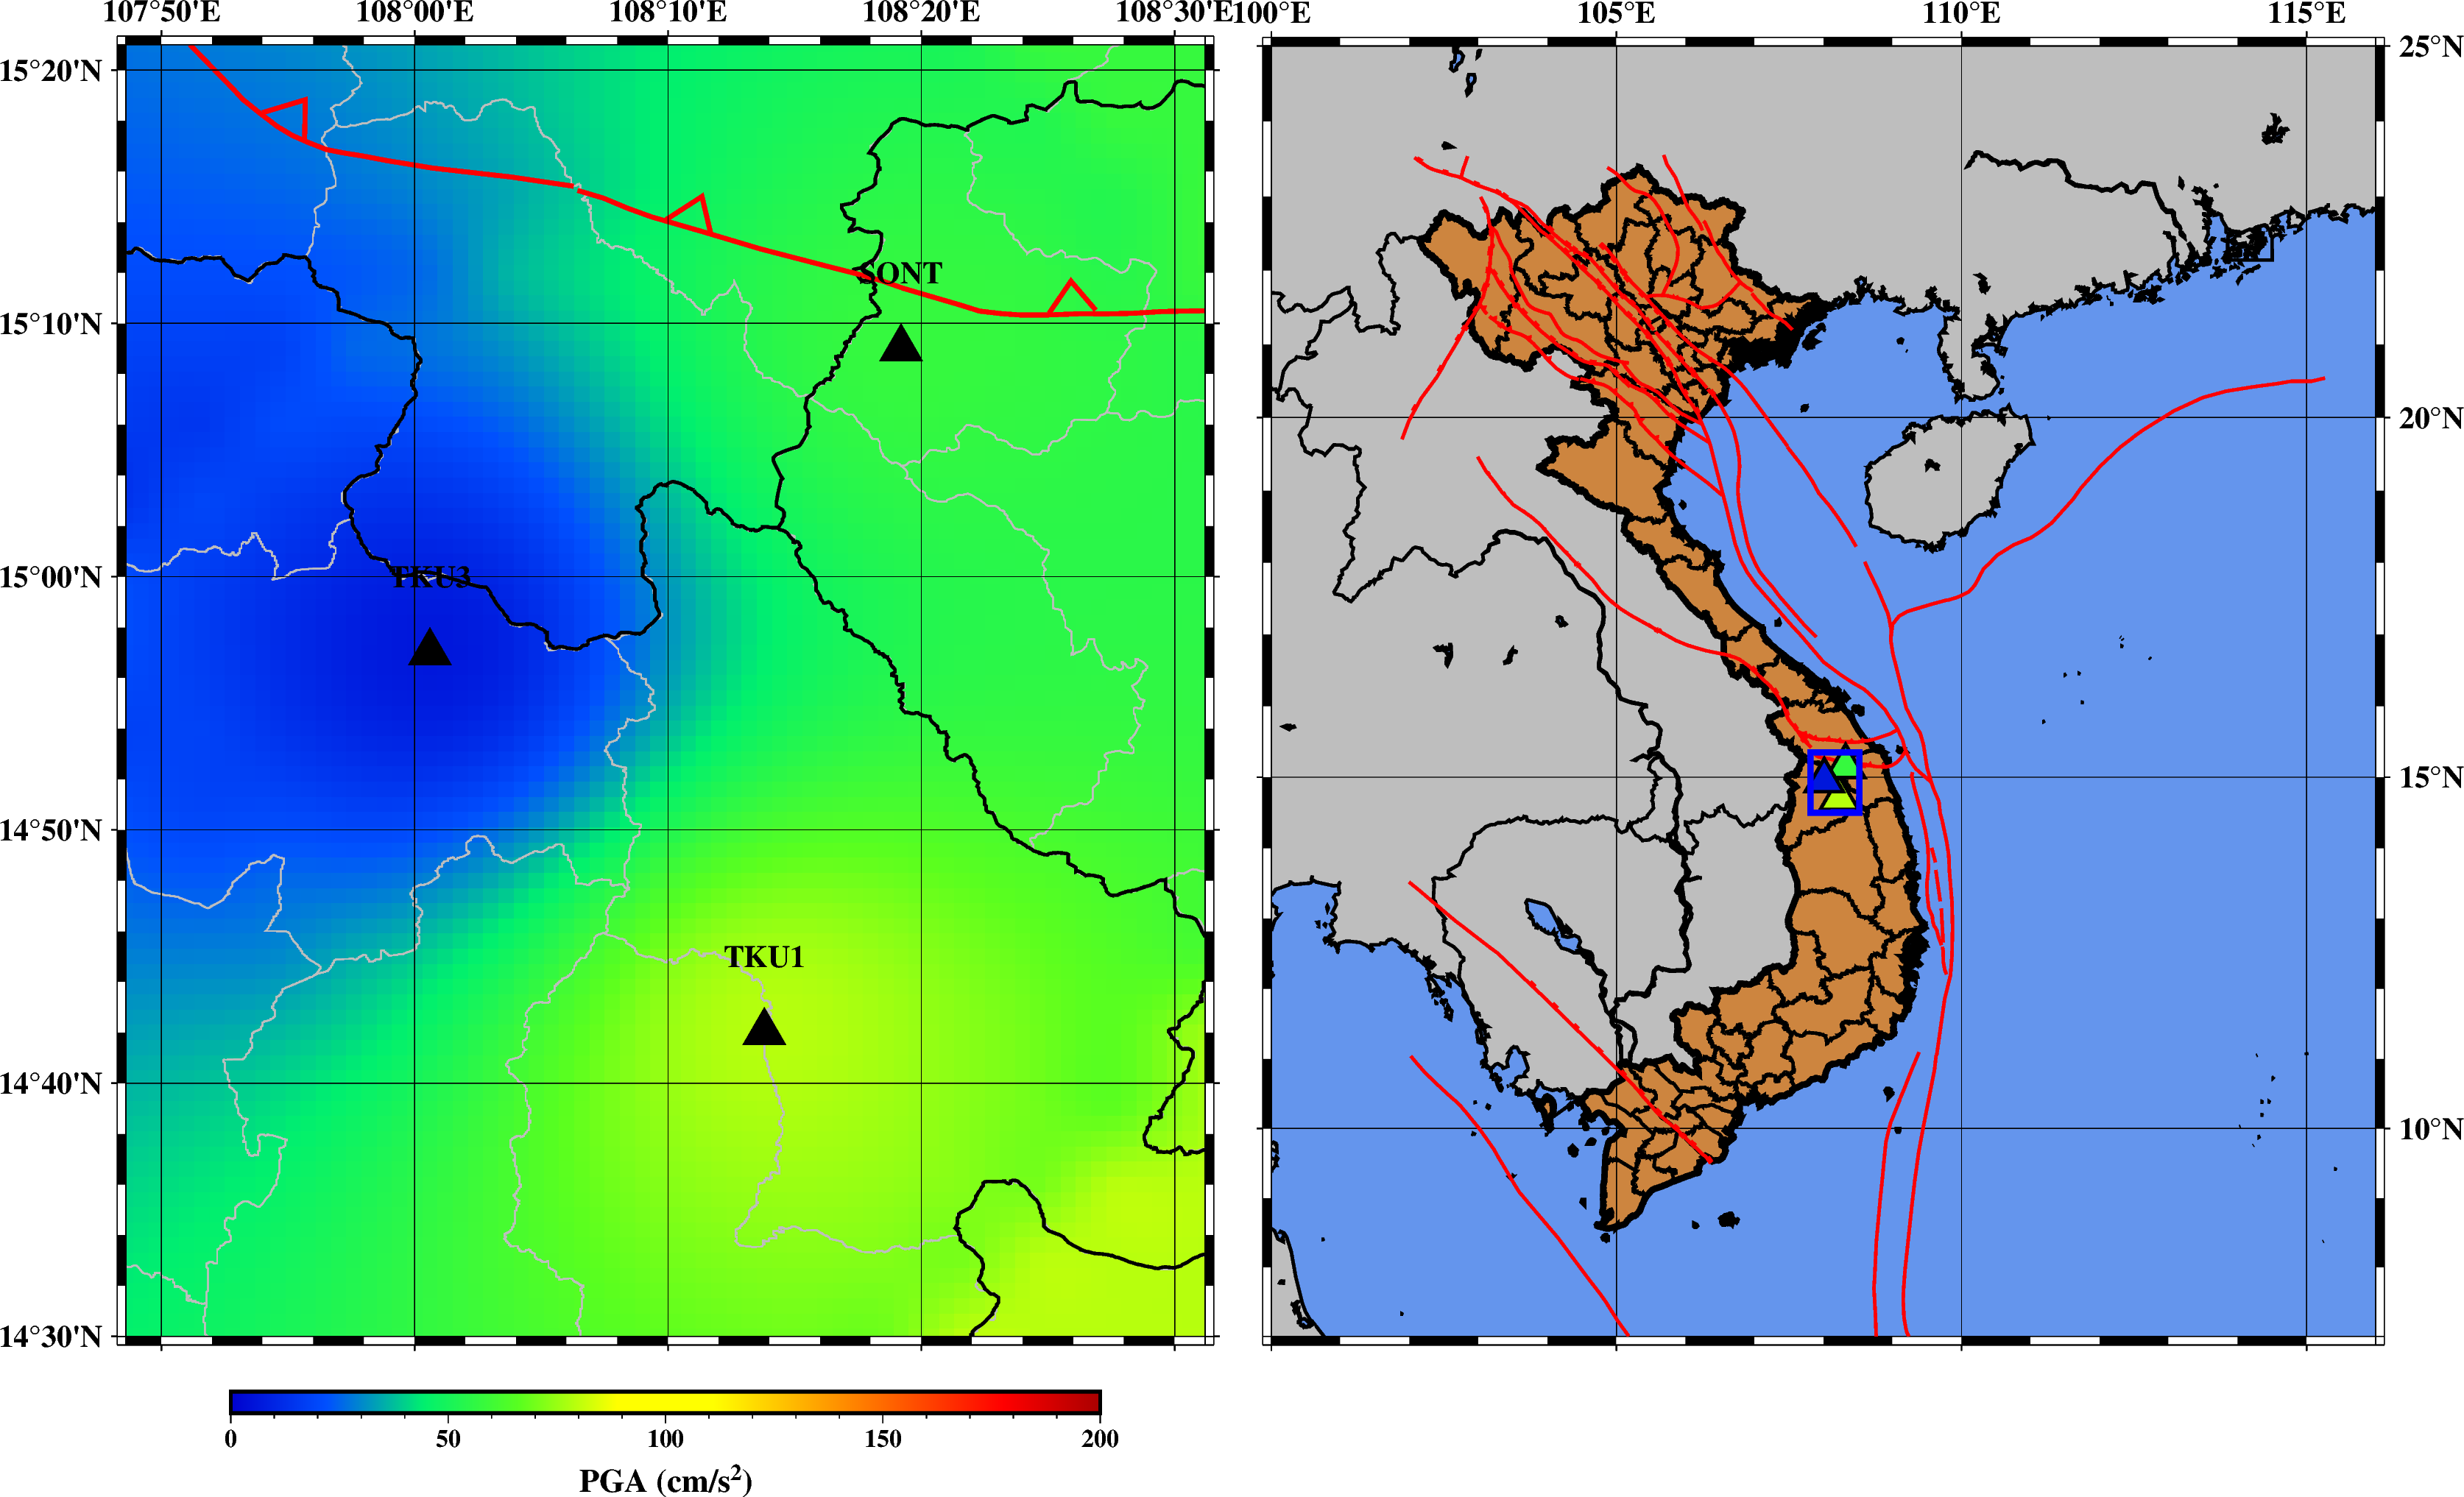

[107.74, 109.02, 14.030000000000001, 15.35]


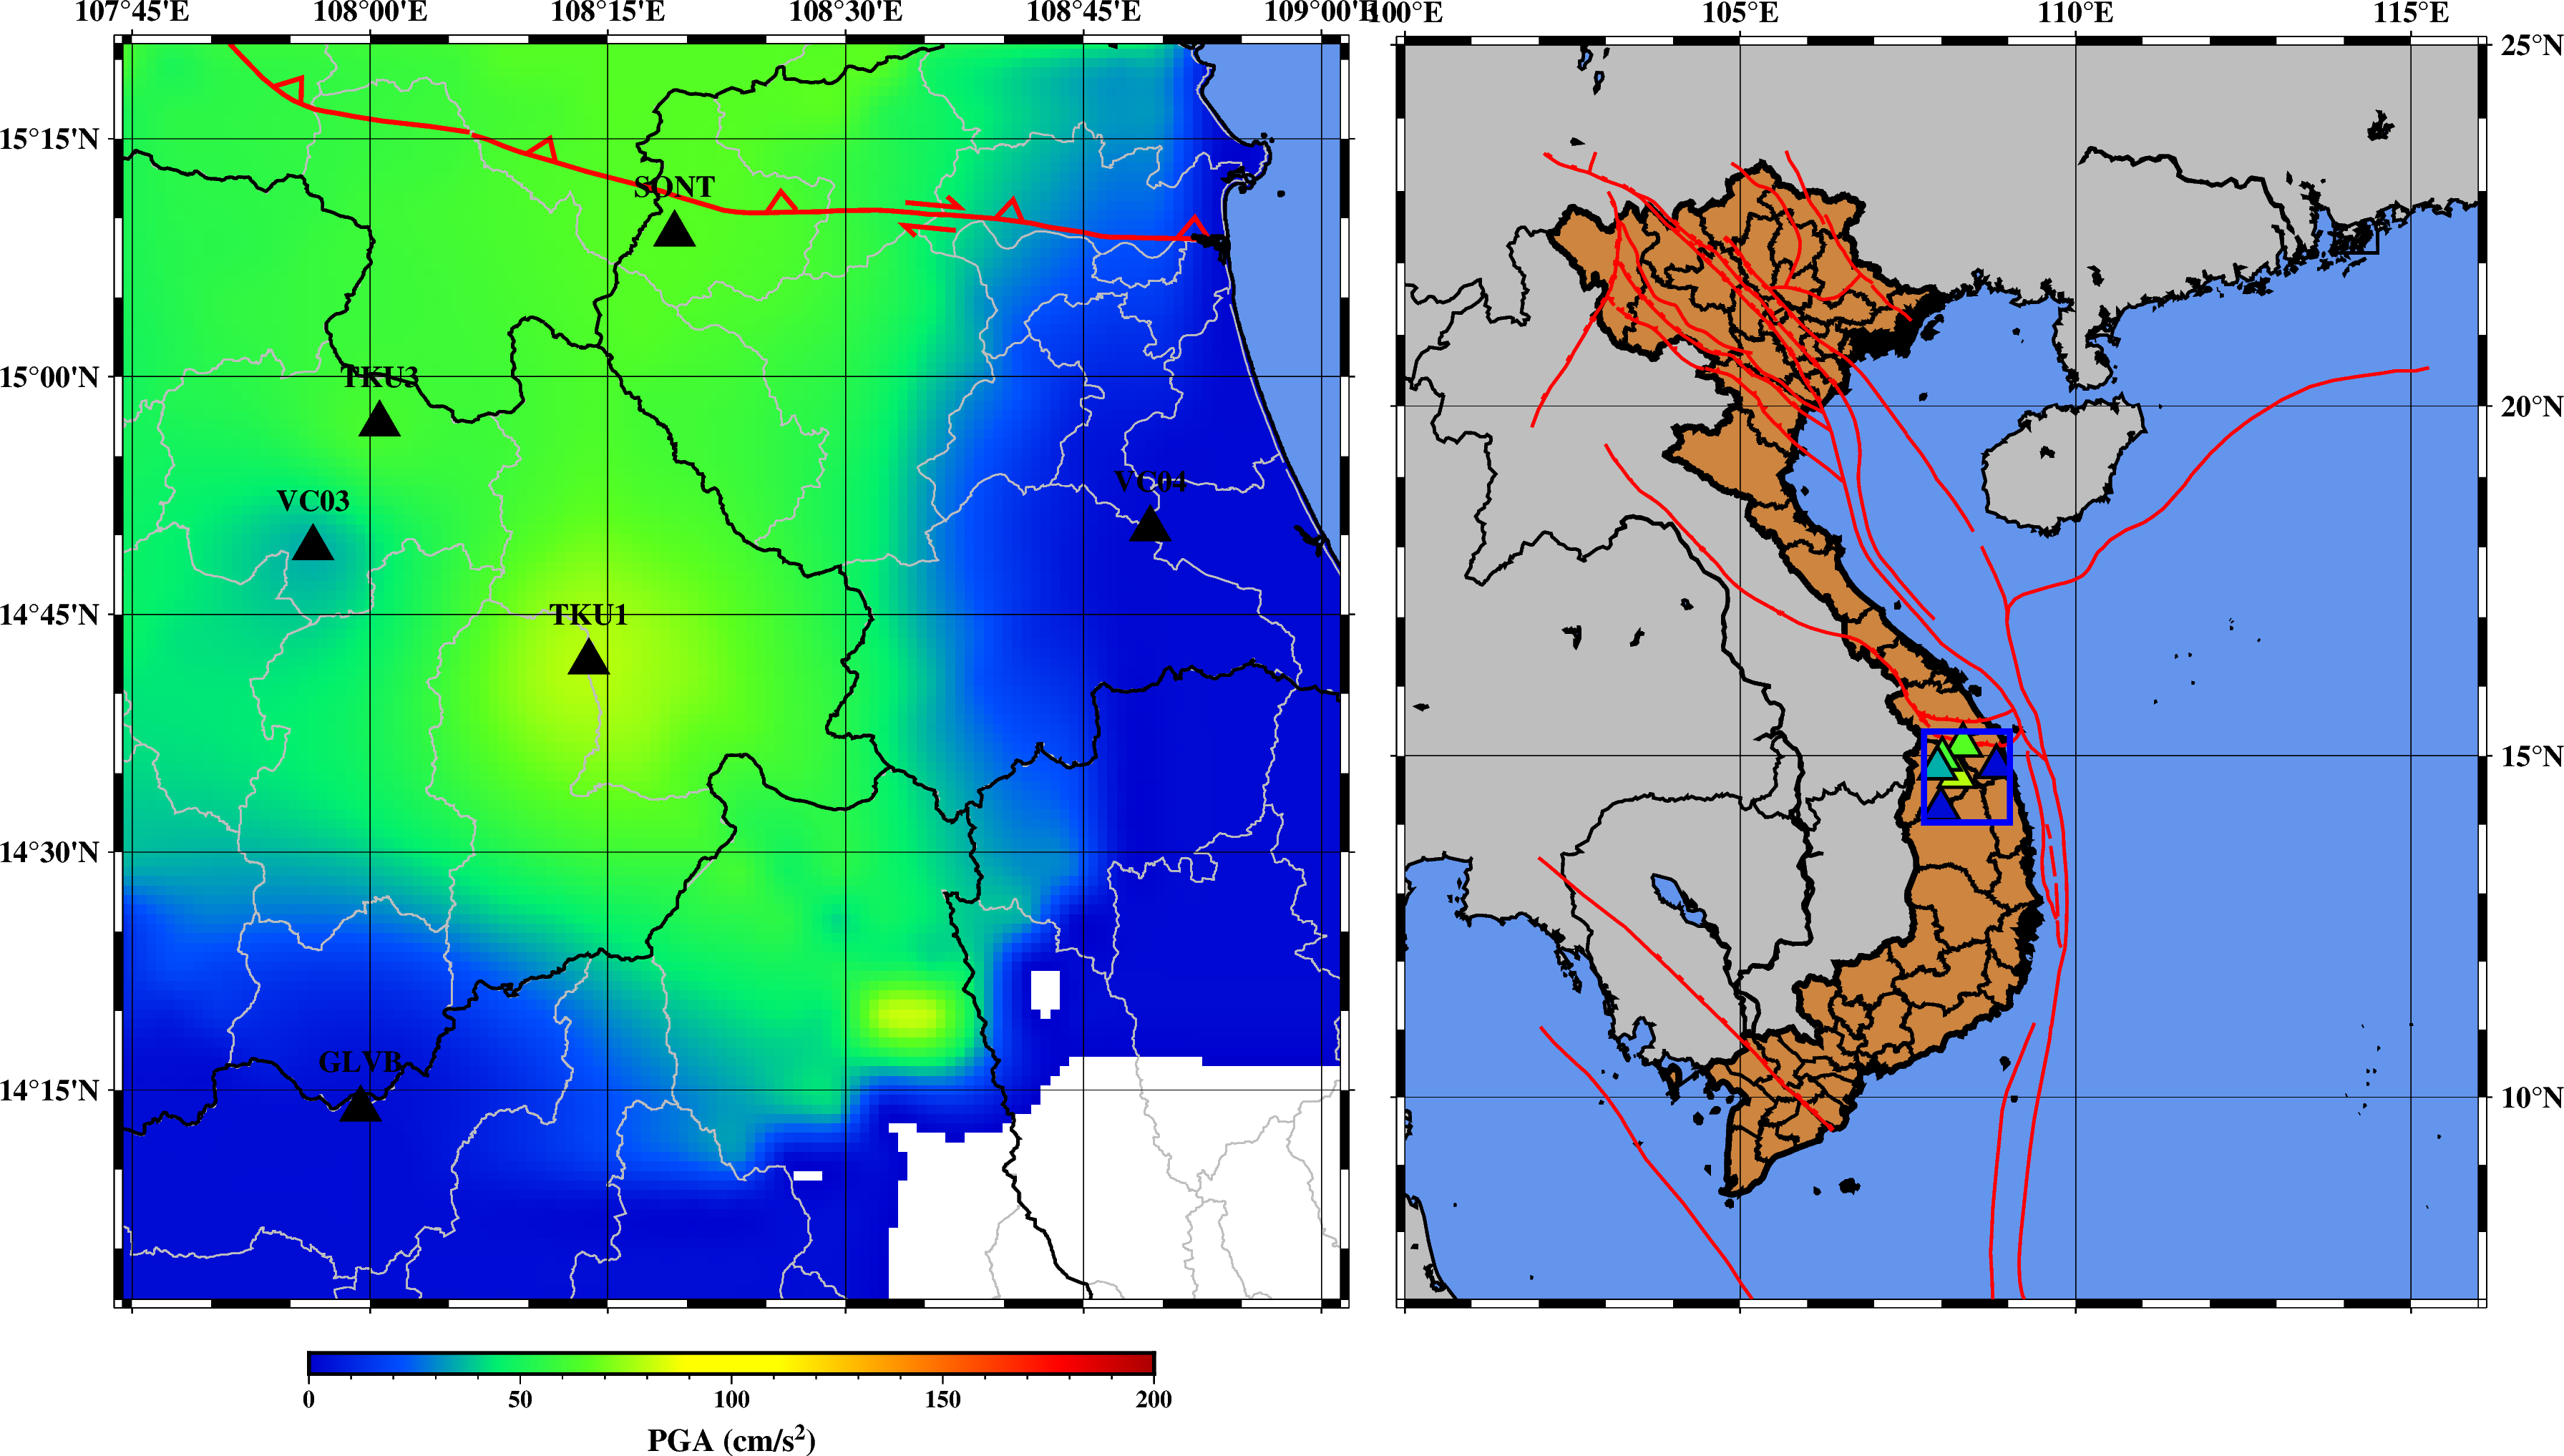

[107.74, 109.02, 13.450000000000001, 15.35]


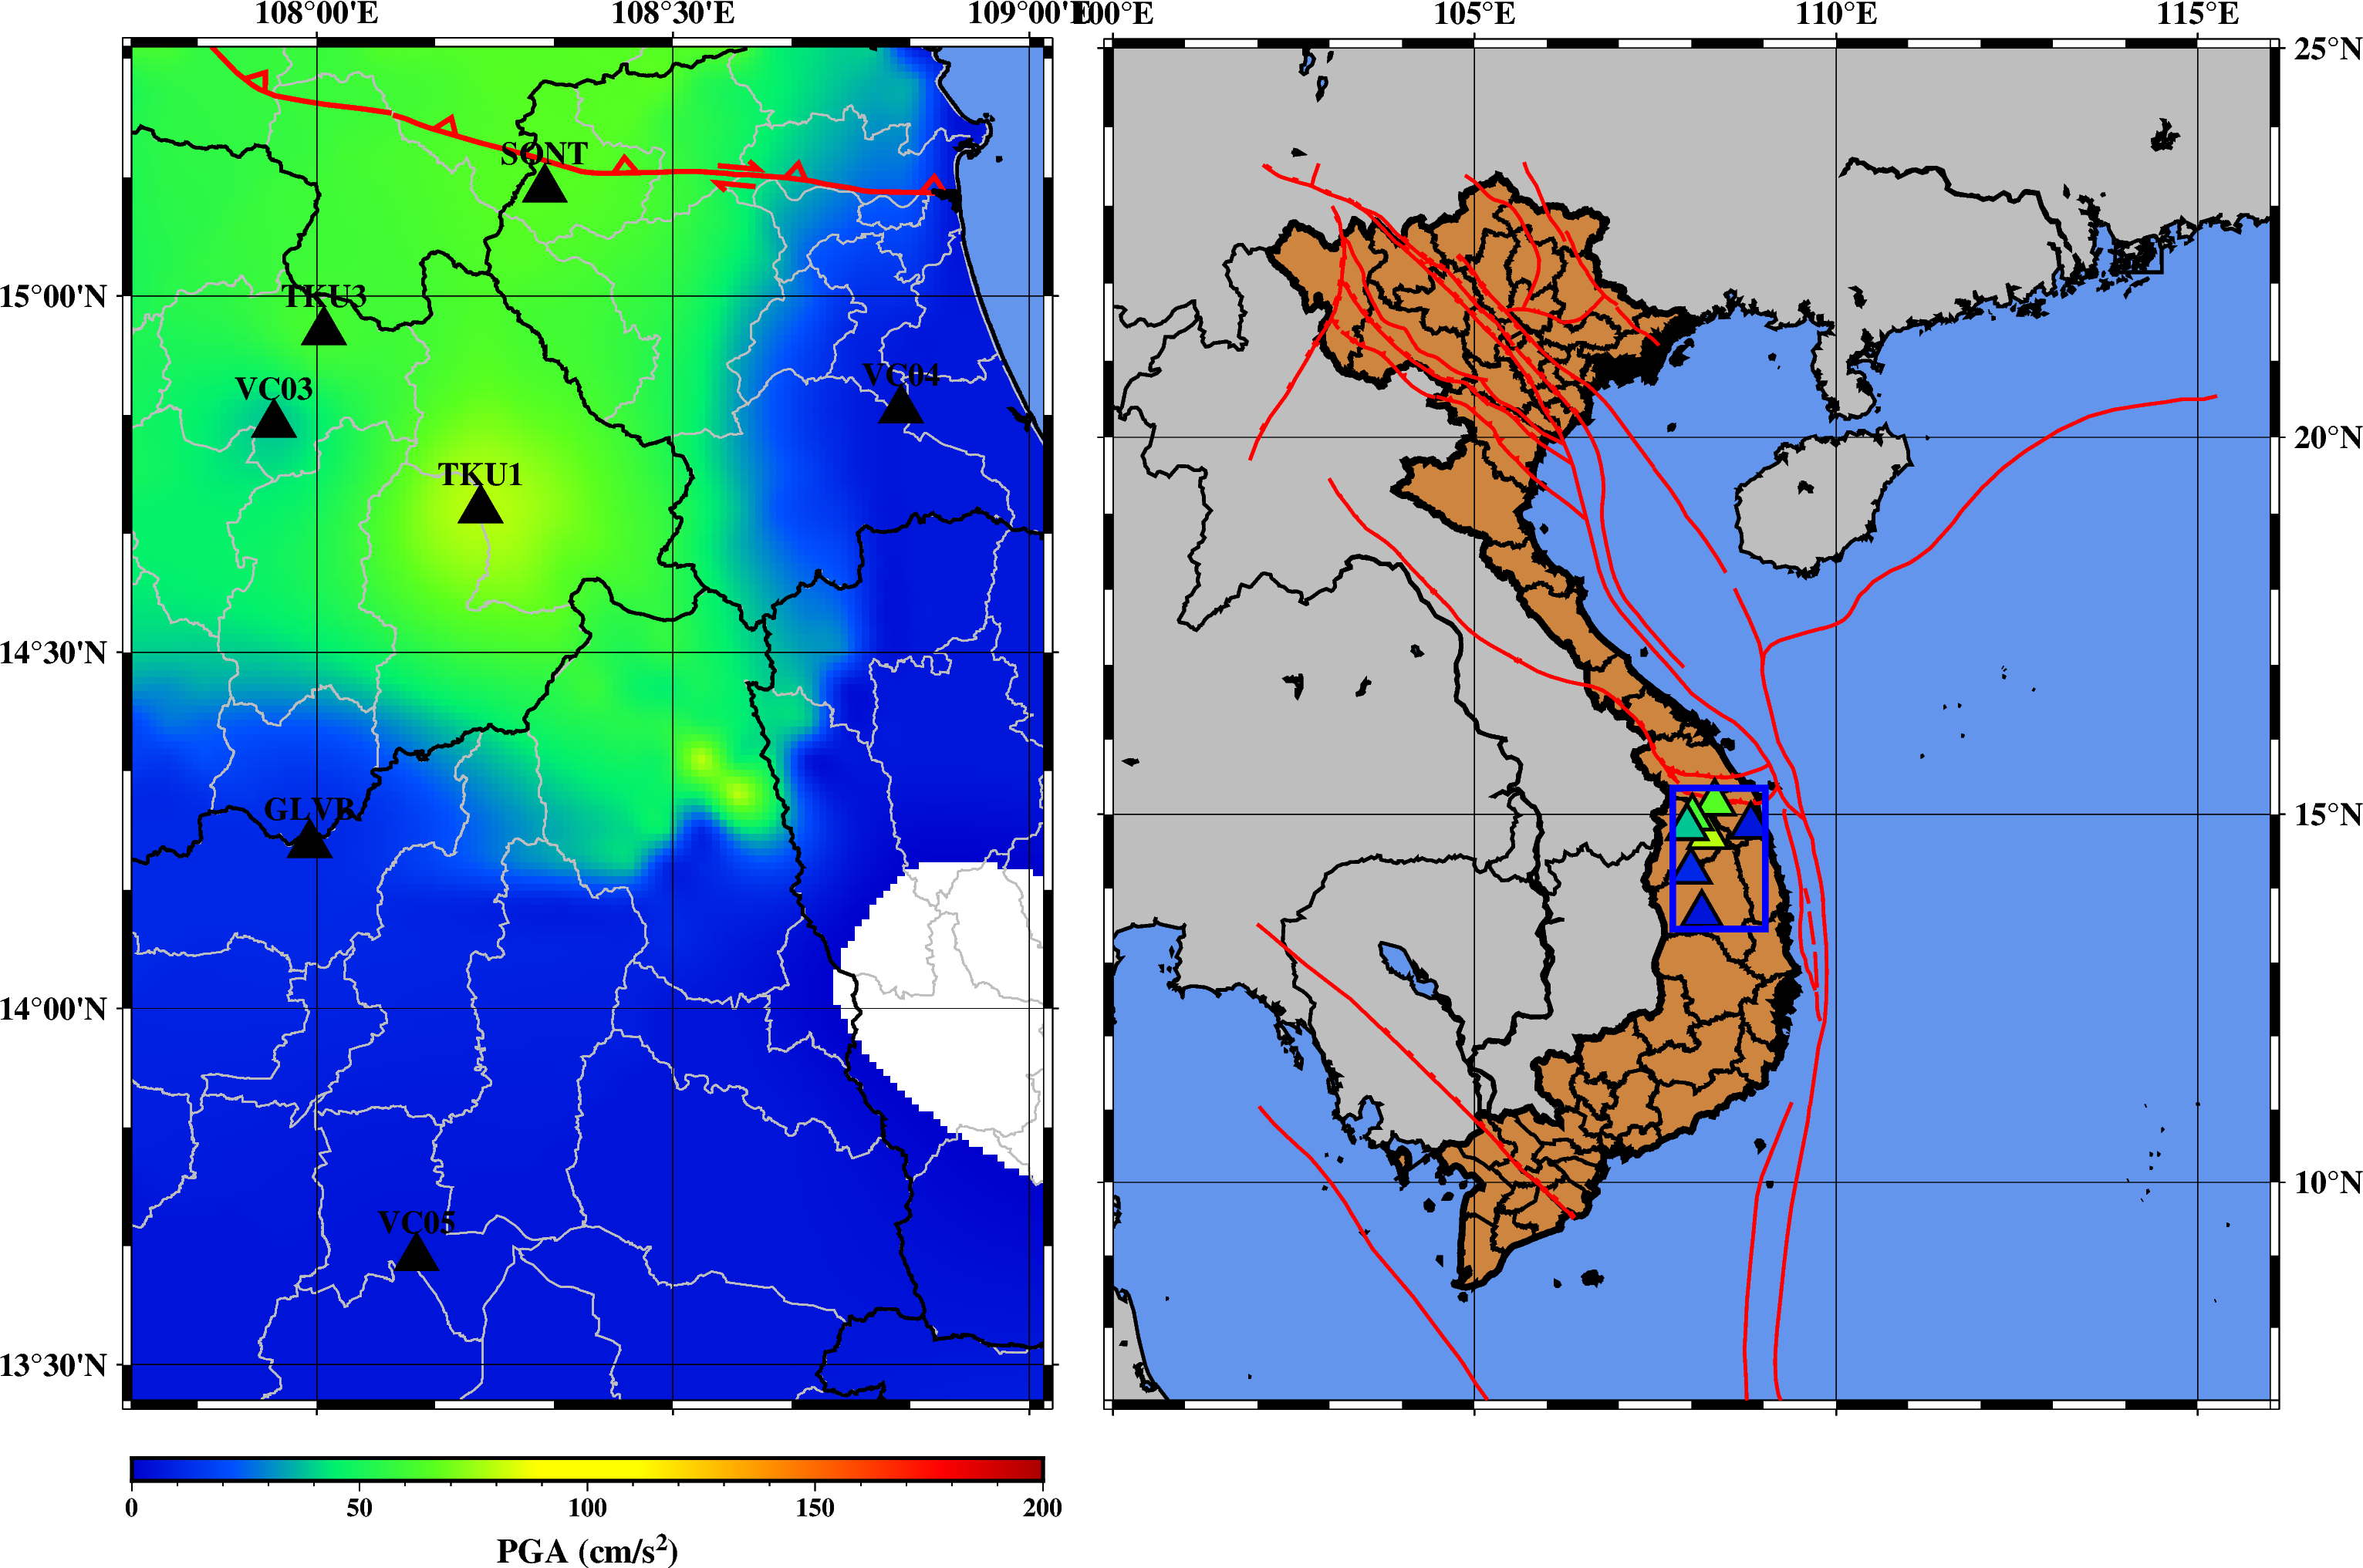

[107.74, 109.02, 13.450000000000001, 15.35]


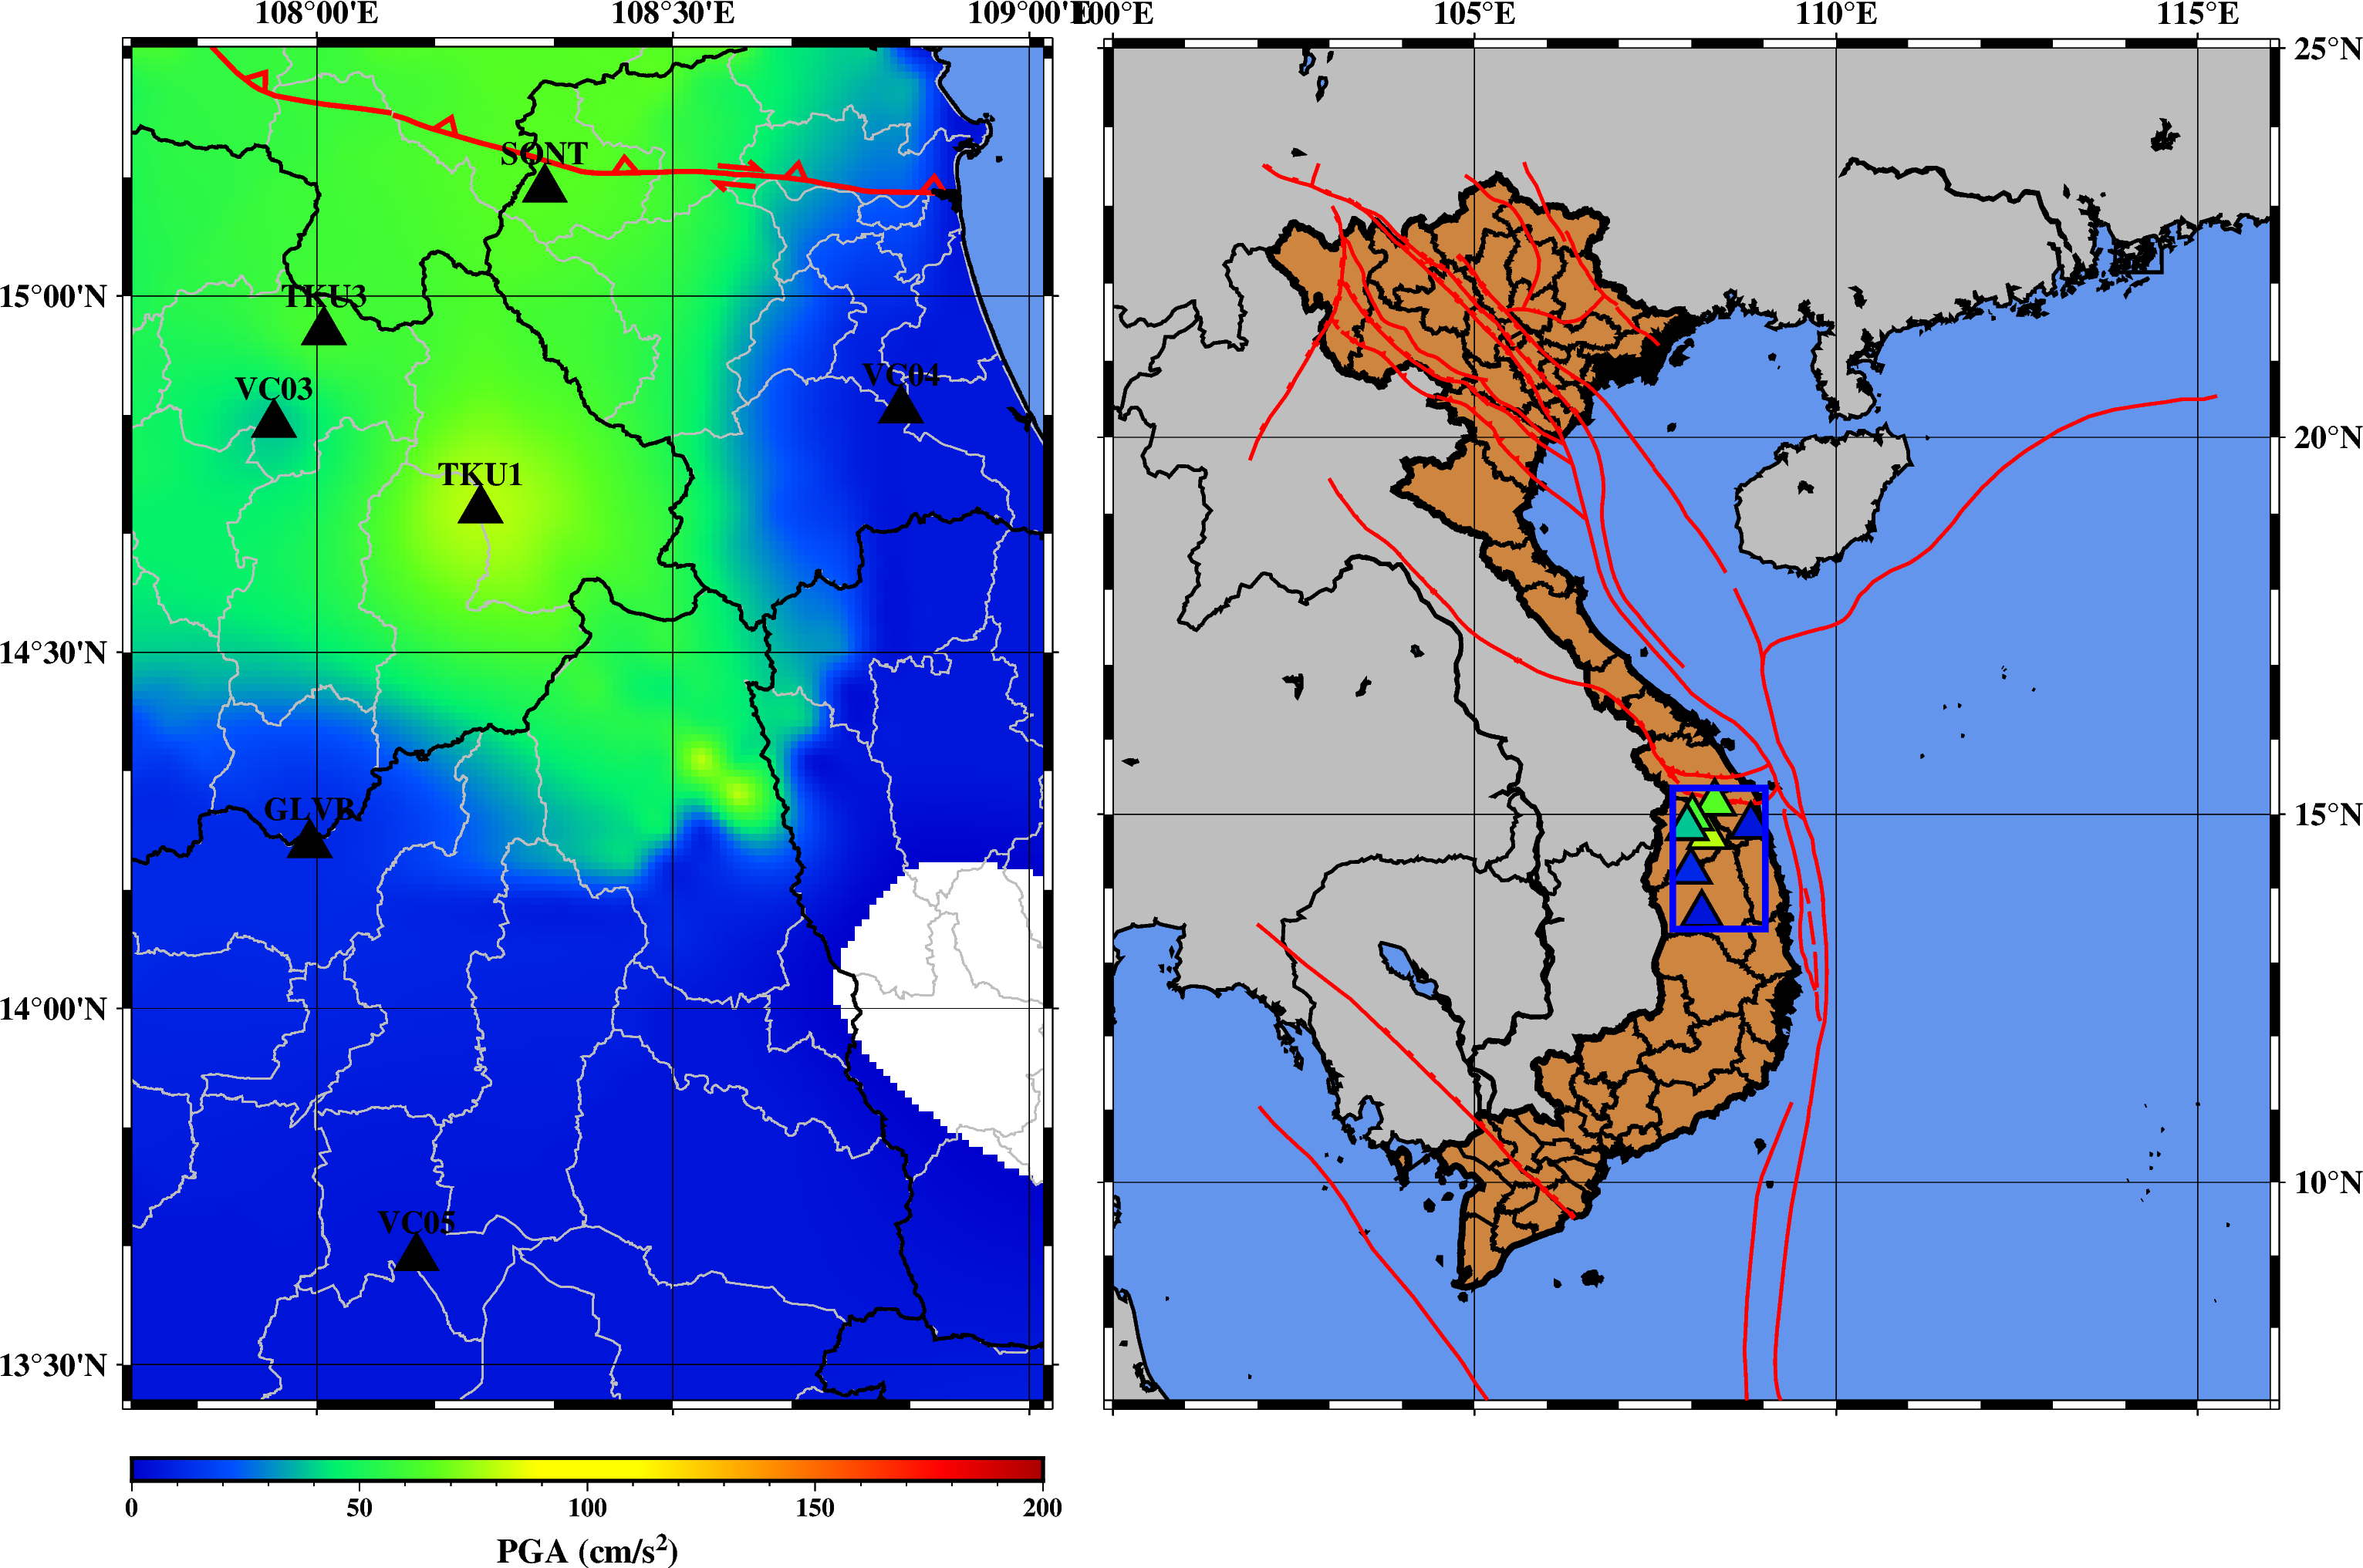

In [27]:
import pandas as pd
import pygmt
import numpy as np
import os, glob
# ------------------------------------------------------------------------------
'''
Plot the Shake map from the PGA data
'''
curdir = os.getcwd()
indir = os.path.join(curdir,"input")
figdir = os.path.join(curdir,"figures")
# Check all report file inside
files = glob.glob(os.path.join(indir,"*acc_sta.txt"))
for file in files:
# for file in (["/data2/longhv/Projects/EEW/shakemap/shake_reports/input/202409260800_acc_sta.txt"]):
    time=file.split("/")[-1].split("_")[0]
    # outfigdir = os.path.join(figdir,time)
    outfigdir = os.path.join(figdir,"20240728043512_Kontum")
    
    if not os.path.isdir(outfigdir):
        print("Make the directory: ",outfigdir)
        os.makedirs(outfigdir)
    
    cross_file=os.path.join(indir,time+"_acc.txt")
    if not os.path.isfile(cross_file):
        print(cross_file," does not exist!")
        continue
    
    sdata=pd.read_csv(file,delim_whitespace=True,names=['name','long','lat','PGA','idx'])
    data=pd.read_csv(cross_file,delim_whitespace=True,names=['long','lat','PGA','idx'])
    
    sdata['sname'] = sdata['name'].str.split(".").str[0]
    # get the 1st indexes values
    sdata_use = sdata[sdata['idx']==sdata['idx'].min()]
    data_use = data[data['idx']==sdata['idx'].min()]
    
    data_use.reset_index(drop=True,inplace=True)
    sdata_use.reset_index(drop=True,inplace=True)
    
    #
    longmin=np.round(sdata_use['long'].min(),2)-0.2
    longmax=np.round(sdata_use['long'].max(),2)+0.2
    latmin=np.round(sdata_use['lat'].min(),2)-0.2
    latmax=np.round(sdata_use['lat'].max(),2)+0.2
    #
    region=[longmin, longmax, latmin, latmax]
    print(region)
    pgagrd = pygmt.surface(x=data_use.long, y=data_use.lat, z=data_use.PGA,
                           nodata=0,
                           region=region, spacing='0.01/0.01')
    fig = pygmt.Figure()
# Config the figure 
    pygmt.config(FONT_LABEL="13p,Times-Bold,black")
    pygmt.config(FONT_TITLE="13p,Times-Bold,black")
    pygmt.config(FONT_ANNOT_PRIMARY="10p,Times-Bold,black")
    pygmt.config(FONT_ANNOT_SECONDARY="10p,Times-Roman,black")
    #
    pygmt.makecpt(cmap="seis", series=[0,200,1],reverse=True,continuous=True)
    fig.grdimage(grid=pgagrd,
#              shading=shade,
                 region=region,
                 projection=f"X{((longmax-longmin)*5.85/(latmax-latmin))}i/5.85i",
                 cmap=True,
                 # frame=["agf","NsWe"],
                 no_clip=False
                )
    fig.plot(data="inc/RanhgioiHuyen.txt",pen="0.5p,gray")
    fig.plot(data="inc/RanhgioiTinh.txt",pen="1.0p,black")
    
    fig.plot(data="inc/fault_lv1.txt",pen="1.5p,red")
    fig.plot(data="inc/fault_lv2_use.txt",pen="1.0p,red")
    
    fig.coast(
          # region=region,
          # projection='M5i',
            frame=["agf","NsWe"],
          shorelines="1.p,black",
          water="cornflowerblue",
          borders=["1/1.5p,black","2/1.5p,black","3/1.5p,black"],
             )
    fig.plot(x=sdata_use.long,y=sdata_use.lat,style="t0.2i", 
             pen="1.0p,black",fill="black")
    
    
    fig.text(x=sdata_use.long,y=sdata_use.lat+0.05,text=sdata_use.sname,fill="white")
    fig.colorbar(position="JBC+o0i/0.25i+w10c/0.25c",frame="x+lPGA (cm/s@+2@+)")
    fig.shift_origin(xshift=f"{((longmax-longmin)*5.85/(latmax-latmin))+0.3}i")
    fig.coast(region=[100,116,7,25],
          projection='M5i',
          land="gray",
          shorelines="1.p,black",
          water="cornflowerblue",
          dcw="VN+gperu+p2p",
          frame=["agf","NswE"],
          borders=["1/1.0p,black","2/1.0p,black","3/1.0p,black"])
    # fig.plot(data="inc/RanhgioiHuyen.txt",pen="0.5p,gray,.")
    fig.plot(data="inc/RanhgioiTinh.txt",pen="1.0p,black")
    
    fig.plot(data="inc/fault_lv1.txt",pen="1.0p,red")
    fig.plot(data="inc/fault_lv2_use.txt",pen="1.0p,red")
    fig.plot(x=sdata_use.long,y=sdata_use.lat,style="t0.2i", 
             pen="1.0p,black",fill=sdata_use.PGA,cmap=True)
    
    fig.plot(x=[longmin,longmax,longmax,longmin,longmin],y=[latmin,latmin,latmax,latmax,latmin],pen="2.0p,blue")
    
    fig.savefig(f"{outfigdir}/{time}_{data['idx'].min()}.png",dpi=300)
    fig.show()    

In [2]:
sdata_use,region

(         name    long    lat    PGA  idx sname
 0  TKU1.VN.--  108.23  14.70  79.20    0  TKU1
 1  SONT.VN.--  108.32  15.15  65.49    0  SONT
 2  TKU3.VN.--  108.01  14.95  61.78    0  TKU3
 3  VC03.VN.--  107.94  14.82  38.56    0  VC03
 4  VC04.VN.--  108.82  14.84   6.16    0  VC04
 5  GLVB.VN.--  107.99  14.23  10.81    0  GLVB
 6  VC05.VN.--  108.14  13.65   5.51    0  VC05,
 [107.74, 109.02, 13.450000000000001, 15.35])